* Material Source: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
* Data: UCI Machine Learning repository

### 0. Labraries

In [1]:
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas
print('pandas: {}'.format(pandas.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
scipy: 1.6.2
numpy: 1.20.1
matplotlib: 3.3.4
pandas: 1.2.4
sklearn: 0.24.1


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### 1. Read Data

In [6]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

### 2. Summarize the Data

In [7]:
# shape
print(dataset.shape)

(150, 5)


In [8]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [9]:
# descriptions
print(dataset.describe())

#all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
# class distribution (3 classes)
print(dataset.groupby('class').size())

#each class has the same number of instances (50 or 33% of the dataset)

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### 3. EDA

#### 3.1 Univariate Plots

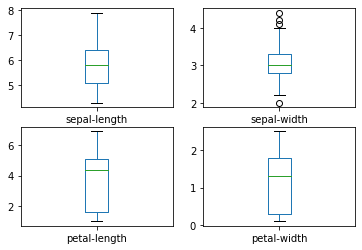

In [11]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

#distribution of the input attributes

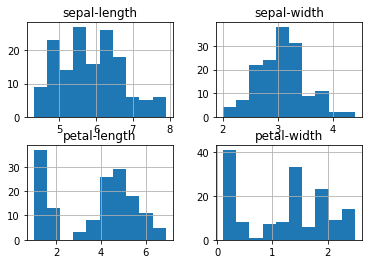

In [12]:
# histograms
dataset.hist()
pyplot.show()

#sepal-length and sepal-width have near normal(Gaussian) distribution

#### 3.2 Multivariate Plots

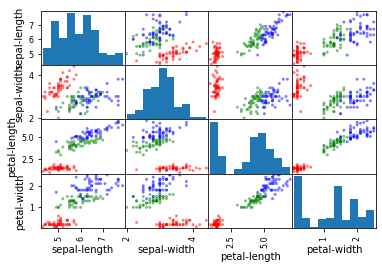

In [17]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
color_map={
 'Iris-setosa': 'r',
 'Iris-versicolor': 'g',
 'Iris-virginica': 'b'
}

dataset['color']=dataset['class'].map(color_map)

scatter_matrix(dataset,color=dataset['color'])
plt.show()

### 4. Model

#### 4.1 Data Spliting

In [21]:
# Split-out validation dataset
array = dataset.values
print(array[0:5,:])

X = array[:,0:4]
y = array[:,4]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

[[5.1 3.5 1.4 0.2 'Iris-setosa' 'r']
 [4.9 3.0 1.4 0.2 'Iris-setosa' 'r']
 [4.7 3.2 1.3 0.2 'Iris-setosa' 'r']
 [4.6 3.1 1.5 0.2 'Iris-setosa' 'r']
 [5.0 3.6 1.4 0.2 'Iris-setosa' 'r']]


In [ ]:
# random_state: We set the random seed via the random_state argument to a fixed number to 
# ensure that each algorithm is evaluated on the same splits of the training dataset.

#### 4.2 Model Building

Let’s test 6 different algorithms:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

In [25]:
# Logistic Regression (LR)

model = LogisticRegression(solver='liblinear', multi_class='auto')
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

#liblinear: Library for Large Linear Classification
#It applies automatic parameter selection (a.k.a L1 Regularization) and it's recommended when you have
#high dimension dataset (recommended for solving large-scale classification problems)



print('LogisticRegression', cv_results.mean(), cv_results.std())

LogisticRegression 0.9416666666666667 0.06508541396588878


* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

    * For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
    * For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
    * ‘liblinear’ is limited to one-versus-rest schemes
   
* multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
    * ‘ovr’, then a binary problem is fit for each label.
    * ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’.
    * ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

In [27]:
# Linear Discriminant Analysis(LDA)

model = LinearDiscriminantAnalysis()
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print('LinearDiscriminantAnalysis', cv_results.mean(), cv_results.std())

LinearDiscriminantAnalysis 0.975 0.03818813079129868


In [28]:
# K Neighbors Classifier(KNN)

model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print('KNeighborsClassifier', cv_results.mean(), cv_results.std())

KNeighborsClassifier 0.9583333333333333 0.04166666666666669


In [29]:
# Decision Tree Classifier(CART)

model = DecisionTreeClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print('DecisionTreeClassifier', cv_results.mean(), cv_results.std())

DecisionTreeClassifier 0.9333333333333332 0.05


In [31]:
# GaussianN(NB)

model = GaussianNB()
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print('GaussianNB', cv_results.mean(), cv_results.std())

GaussianNB 0.95 0.05527707983925667


In [32]:
# SVM

model = SVC(gamma='auto')
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print('SVM', cv_results.mean(), cv_results.std())

#kernel: linear, rbf

SVC 0.9833333333333332 0.03333333333333335


In [33]:
# Compare Algorithms with loop
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


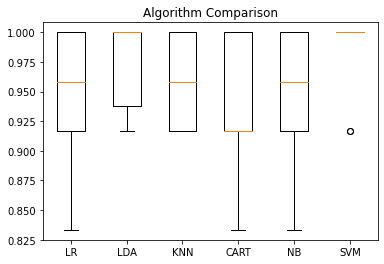

In [34]:
# Compare Algorithms with visuals
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### 5. Make Predictions

In [37]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [39]:
# Save model and load model
import pickle

# save the model to disk
filename = 'SVM_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_validation, y_validation)
print(result)

0.9666666666666667


In [42]:
# Evaluate predictions
print(model.score(X_validation, y_validation))
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

